In [17]:
nb_of_total_msas = 0
genes_where_we_started_updating_MSA = set()
genes_where_we_finished_updating_MSA = set()
runtimes = []
with open("update_msas.log") as fin:
    for line in fin:
        line_split = line.strip().split()
        if line_split[3]=="Updating" and line_split[5]=="MSAs...":
            nb_of_total_msas = int(line_split[4])
        elif "Updating MSA for" in line:
            genes_where_we_started_updating_MSA.add(line_split[-1][:-3])
        elif "Finished updating MSA for" in line:
            genes_where_we_finished_updating_MSA.add(line_split[-1])
        elif "MAFFT update runtime for" in line:
            runtimes.append(float(line_split[-1]))


In [18]:
print(f"Total number of locus to update: {nb_of_total_msas}")
print(f"Number of loci where we started the update: {len(genes_where_we_started_updating_MSA)}")
print(f"Number of loci where we finished the update: {len(genes_where_we_finished_updating_MSA)}")

Total number of locus to update: 8912
Number of loci where we started the update: 8813
Number of loci where we finished the update: 8802


In [19]:
print(f"Loci that we started the update but did not finish: {genes_where_we_started_updating_MSA - genes_where_we_finished_updating_MSA}")

Loci that we started the update but did not finish: {'GC00000015_10', 'GC00000721_6', 'GC00000230_9', 'GC00000145_9', 'GC00000739', 'GC00000205_8', 'GC00000258_r1_1', 'GC00000089_14', 'GC00001169_2', 'GC00000201_5', 'GC00000012_97'}


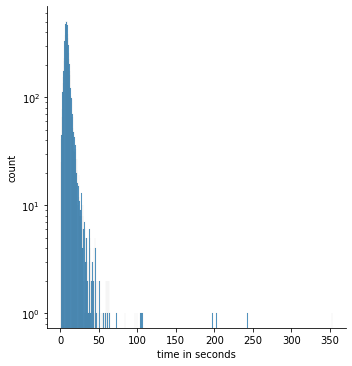

In [27]:
import seaborn as sns
ax = sns.displot(runtimes, log_scale=(False, True))
ax.set(xlabel='time in seconds', ylabel='count')
ax